In [43]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [44]:
df = pd.read_csv("./bases/clean_db.csv")

In [45]:
df[df['id'] == 'tt28223926']

,Unnamed: 0,id,Title,Year,Genre,BoxOffice,budget,popularity,production_companies,revenue,runtime,Internet Movie Database,Rotten Tomatoes,Metacritic
2,2,tt28223926,Skincare,2024,"Comedy, Horror, Mystery","$456,590",0,5.415,"Jalapeno Goat,Iervolino & Lady Bacardi Enterta...",451381,96,5.7/10,69%,NaN


In [46]:
df = df.dropna(subset=['Internet Movie Database', 'Rotten Tomatoes', 'popularity', 'runtime', 'Genre']).drop(columns=['Metacritic'])

In [47]:
df['imdb'] = df['Internet Movie Database'].apply(lambda s : float(s.split('/')[0]))

In [48]:
df['rotten'] = df['Rotten Tomatoes'].apply(lambda s : int(s.replace('%', '')))

In [49]:
dfdf = df.drop(columns=['Internet Movie Database', 'Rotten Tomatoes'])

In [50]:
df['production_companies'] = df['production_companies'].dropna().apply(lambda s : list(map(str.strip, s.split(','))))
del df['production_companies']

In [51]:
df['genres'] = df['Genre'].dropna().apply(lambda s : list(map(str.strip, s.split(','))))
del df['Genre']

In [64]:
df['budget'].max()

np.int64(460000000)

In [62]:
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]
df.shape

(611, 14)

In [59]:
prejus = df[(df['budget'] > df['revenue'])].copy()

print(prejus.shape)

prejus['saldo'] = prejus['revenue'] - prejus['budget']

(267, 14)


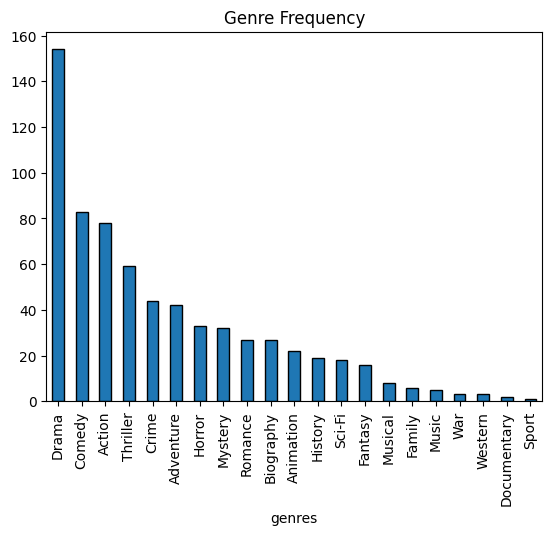

In [55]:

prejus.explode('genres')['genres'].value_counts().plot(kind='bar', title='Genre Frequency', edgecolor='black')

plt.show()

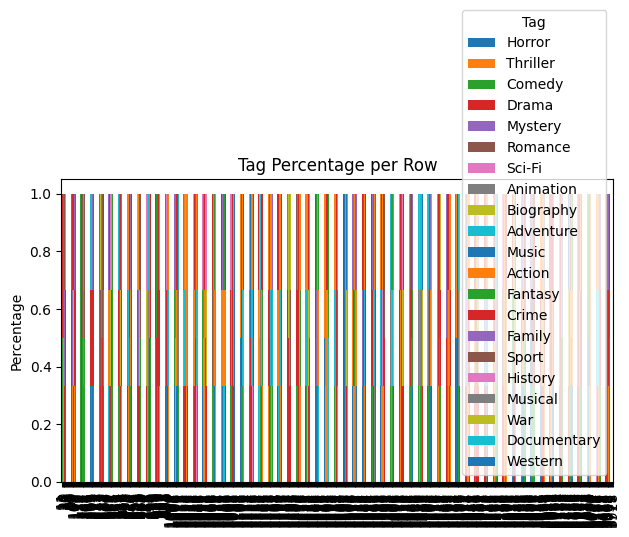

In [57]:
# Step 2: Convert each list to a value count Series
row_percentages = df['genres'].apply(lambda x: pd.Series(x).value_counts(normalize=True))

# Optional: fill NaN with 0
#row_percentages = row_percentages.fillna(0)
tag_a_percentage = row_percentages.get('Drama', pd.Series([0]*len(df))).fillna(0)


# Step 3: Plot
row_percentages.plot(kind='bar', stacked=True)
plt.ylabel('Percentage')
plt.title('Tag Percentage per Row')
plt.legend(title='Tag')
plt.tight_layout()
plt.show()

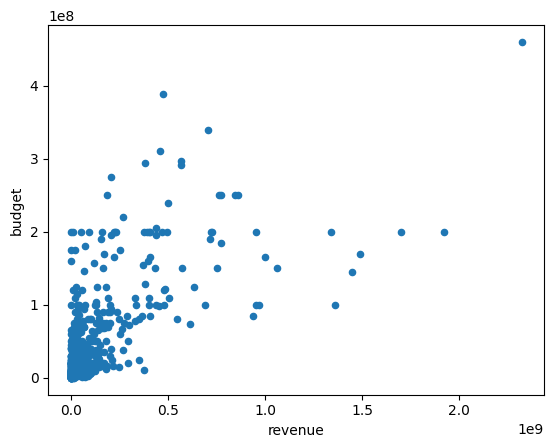

In [21]:
df.plot(kind="scatter", x="budget", y="reve")

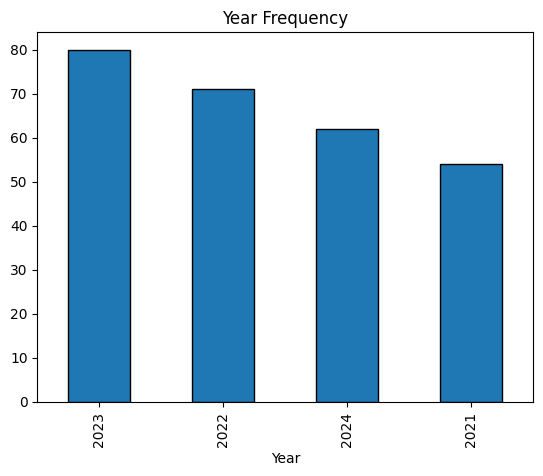

In [12]:
# prejus['saldo'].plot(kind='hist')

#prejus.plot(kind='hist', x)


prejus.explode('Year')['Year'].value_counts().plot(kind='bar', title='Year Frequency', edgecolor='black')

plt.show()


In [14]:
ganho_df = df[(df['budget'] < df['revenue'])].copy()

print(ganho_df.shape)

ganho_df['saldo'] = ganho_df['revenue'] - ganho_df['budget']

(344, 12)


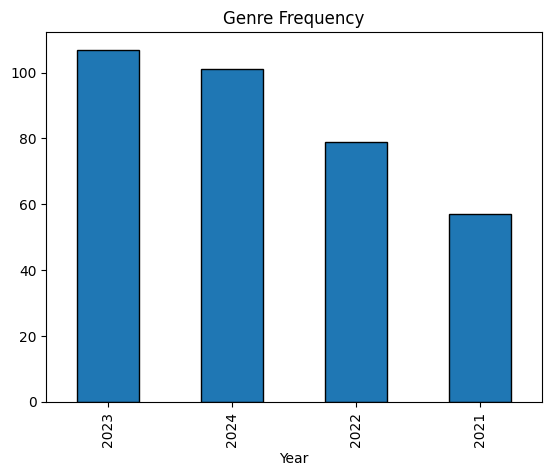

In [15]:
# prejus['saldo'].plot(kind='hist')

#prejus.plot(kind='hist', x)


ganho_df.explode('Year')['Year'].value_counts().plot(kind='bar', title='Genre Frequency', edgecolor='black')

plt.show()


,Unnamed: 0,id,Title,Year,BoxOffice,budget,popularity,production_companies,revenue,runtime,imdb,rotten,genres
